In [1]:
!apt-get update
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:13 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:14 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:15 http://ppa

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['axes.unicode_minus'] = False

plt.rc('font', family = 'NanumBarunGothic')

In [4]:
import pandas as pd

CCTV = pd.read_csv('seoulCCTV.csv')
CCTV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   기관명        25 non-null     object
 1   소계         25 non-null     int64 
 2   2013년도 이전  25 non-null     int64 
 3   2014년      25 non-null     int64 
 4   2015년      25 non-null     int64 
 5   2016년      25 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.3+ KB


In [35]:
CCTV.rename(columns={CCTV.columns[0]:'구별'}, inplace=True)
CCTV.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [36]:
CCTV['최근증가율'] = ((CCTV['2014년']+CCTV['2015년']+CCTV['2016년'])/CCTV['2013년도 이전']) *100
CCTV.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,2780,1292,430,584,932,150.619195
1,강동구,773,379,99,155,377,166.490765
2,강북구,748,369,120,138,204,125.203252
3,강서구,884,388,258,184,81,134.793814
4,관악구,1496,846,260,390,613,149.290780


In [37]:
CCTV.rename(columns={'소계':'CCTV총합'}, inplace=True)
CCTV.head()

,구별,CCTV총합,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,2780,1292,430,584,932,150.619195
1,강동구,773,379,99,155,377,166.490765
2,강북구,748,369,120,138,204,125.203252
3,강서구,884,388,258,184,81,134.793814
4,관악구,1496,846,260,390,613,149.290780


In [38]:
CCTV = CCTV.loc[:,['구별','CCTV총합','최근증가율']]
CCTV.head()

,구별,CCTV총합,최근증가율
0,강남구,2780,150.619195
1,강동구,773,166.490765
2,강북구,748,125.203252
3,강서구,884,134.793814
4,관악구,1496,149.290780


In [28]:
Pp = pd.read_excel('seoulPopulation.xls')
Pp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   기간        28 non-null     object
 1   자치구       28 non-null     object
 2   세대        28 non-null     object
 3   인구        28 non-null     object
 4   인구.1      28 non-null     object
 5   인구.2      28 non-null     object
 6   인구.3      28 non-null     object
 7   인구.4      28 non-null     object
 8   인구.5      28 non-null     object
 9   인구.6      28 non-null     object
 10  인구.7      28 non-null     object
 11  인구.8      28 non-null     object
 12  세대당인구     28 non-null     object
 13  65세이상고령자  28 non-null     object
dtypes: object(14)
memory usage: 3.3+ KB


In [29]:
Pp = pd.read_excel('seoulPopulation.xls',
                   header = 2,
                   usecols = 'B, D, G, J, N')
Pp.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [30]:
Pp.shape

(27, 5)

In [31]:
Pp.rename(columns = {Pp.columns[0]:'구별',
                     Pp.columns[1]:'인구수',
                     Pp.columns[2] :'한국인',
                     Pp.columns[3]:'외국인',
                     Pp.columns[4] : '고령자'}, inplace=True)
Pp.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [32]:
Pp.drop([0], inplace=True)
Pp.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


In [33]:
Pp['구별'].isnull()

1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26     True
Name: 구별, dtype: bool

In [34]:
Pp.dropna(subset=['구별'], how='any', axis=0).shape

(25, 5)

In [39]:
CCTV.head()

,구별,CCTV총합,최근증가율
0,강남구,2780,150.619195
1,강동구,773,166.490765
2,강북구,748,125.203252
3,강서구,884,134.793814
4,관악구,1496,149.290780


In [40]:
Pp.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


In [44]:
DF = pd.merge(CCTV,Pp, on='구별')
DF.head()

,구별,CCTV총합,최근증가율,인구수,한국인,외국인,고령자
0,강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0
1,강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0
2,강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0
3,강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0
4,관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0


In [45]:
DF['외국인비율'] = ((DF['외국인']/DF['인구수'])*100)

In [46]:
DF['고령자비율'] = DF['고령자'] /DF['인구수'] * 100
DF.head()

,구별,CCTV총합,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


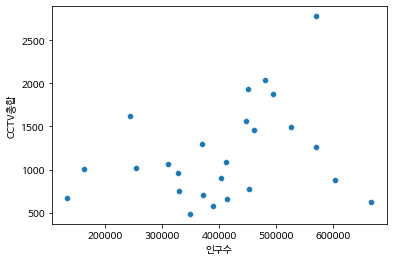

In [43]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sns.scatterplot(DF['인구수'], DF['CCTV총합'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


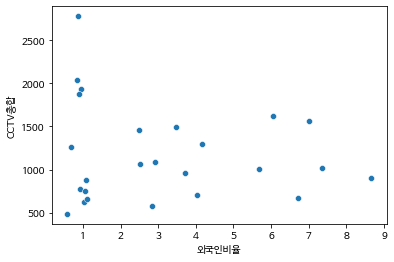

In [47]:
sns.scatterplot(DF['외국인비율'], DF['CCTV총합'])
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


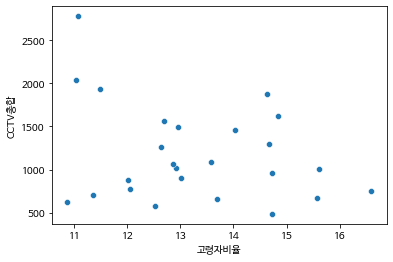

In [48]:
sns.scatterplot(DF['고령자비율'], DF['CCTV총합'])
plt.show()

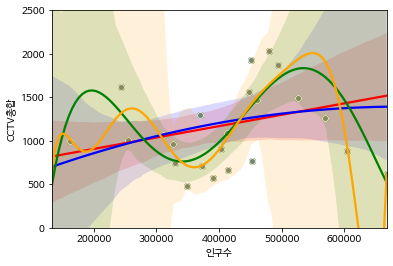

In [65]:
sns.regplot(x='인구수', y='CCTV총합', data=DF, line_kws={'color':'red'})
sns.regplot(x='인구수', y='CCTV총합', data=DF, line_kws={'color':'blue'}, order =2)
sns.regplot(x='인구수', y='CCTV총합', data=DF, line_kws={'color':'green'}, order =5)
sns.regplot(x='인구수', y='CCTV총합', data=DF, line_kws={'color':'orange'}, order =9,  scatter_kws={'color':'gray', 'edgecolor':'white'})

plt.ylim(0,2500)
plt.show()


In [49]:
from sklearn.model_selection import train_test_split

x_remain, x_test, y_remain, y_test = train_test_split(DF[['인구수']], DF[['CCTV총합']],
                                                      test_size=int(len(DF)*0.2),
                                                      random_state = 2045)
print(x_remain.shape, y_remain.shape)
print(x_test.shape, y_test.shape)

(20, 1) (20, 1)
(5, 1) (5, 1)


In [50]:
x_train, x_vd, y_train, y_vd = train_test_split(x_remain, y_remain,
                                                test_size=int(len(DF)*0.2),
                                                random_state =2045)
print(x_train.shape, y_train.shape)
print(x_vd.shape, y_vd.shape)

(15, 1) (15, 1)
(5, 1) (5, 1)


In [51]:
from sklearn.linear_model import LinearRegression

Model1 = LinearRegression()
Model1.fit(x_train, y_train)

y_hat_1 = Model1.predict(x_vd)

from sklearn.metrics import mean_squared_error
Err_1 = mean_squared_error(y_vd, y_hat_1)
Err_1

238951.46338906878

In [66]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 5, include_bias=False)
PX_5 = poly.fit_transform(x_train)

from sklearn.linear_model import LinearRegression

Model5=LinearRegression()
Model5.fit(PX_5, y_train)

PX_5_vd = poly.fit_transform(x_vd)
y_hat_5 = Model5.predict(PX_5_vd)

from sklearn.metrics import mean_squared_error
Err_5 = mean_squared_error(y_vd, y_hat_5)
Err_5

877329.3691319842

In [67]:
from sklearn.preprocessing import PolynomialFeatures

poly=PolynomialFeatures(degree=9, include_bias=False)
PX_9 = poly.fit_transform(x_train)

from sklearn.linear_model import LinearRegression

Model9 = LinearRegression()
Model9.fit(PX_9, y_train)

PX_9_vd = poly.fit_transform(x_vd)
y_hat_9 = Model9.predict(PX_9_vd)

from sklearn.metrics import mean_squared_error

Err_9 = mean_squared_error(y_vd, y_hat_9)
Err_9

184034.14116922815

In [68]:
print(Err_1)
print(Err_5)
print(Err_9)

238951.46338906878
877329.3691319842
184034.14116922815


In [69]:
PX_9_TE = poly.fit_transform(x_test)

mean_squared_error(y_test, Model9.predict(PX_9_TE))

1135326.6667614416

In [70]:
poly= PolynomialFeatures(degree =5, include_bias=False)
PX_5_TE = poly.fit_transform(x_test)

mean_squared_error(y_test, Model5.predict(PX_5_TE))

719812.6712383027